# Reading the parquet file

## importing the libraries and reading the Parquet file

In [3]:
import gc
import polars as pl
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

train = pl.read_parquet('../data/train.parquet')
test = pl.read_parquet('../data/test.parquet')

In [4]:
train.head()

session,aid,ts,type
i32,i32,i32,u8
0,1517085,1659304800,0
0,1563459,1659304904,0
0,1309446,1659367439,0
0,16246,1659367719,0
0,1781822,1659367871,0


In [5]:
test.head()

session,aid,ts,type
i32,i32,i32,u8
12899779,59625,1661724000,0
12899780,1142000,1661724000,0
12899780,582732,1661724058,0
12899780,973453,1661724109,0
12899780,736515,1661724136,0


In [6]:
train['type'].unique()

type
u8
0
1
2


In [7]:
train['aid'].n_unique()

1855603

In [8]:
train['session'].n_unique()

12899779

In [9]:
train.describe()

describe,session,aid,ts,type
str,f64,f64,f64,f64
"""count""",2.16716096e8,2.16716096e8,2.16716096e8,2.16716096e8
"""null_count""",0.0,0.0,0.0,0.0
"""mean""",4.7028e6,928805.229105,1.6605e9,0.125021
"""std""",3.6650e6,536691.747782,696145.02771,0.395534
"""min""",0.0,0.0,1.6593e9,0.0
"""max""",1.2899778e7,1.855602e6,1.6617e9,2.0
"""median""",3.915777e6,928109.0,1.6605e9,0.0


In [10]:
df = train

In [11]:
df

session,aid,ts,type
i32,i32,i32,u8
0,1517085,1659304800,0
0,1563459,1659304904,0
0,1309446,1659367439,0
0,16246,1659367719,0
0,1781822,1659367871,0
0,1152674,1659367885,0
0,1649869,1659369893,1
0,461689,1659369898,1
0,305831,1659370027,2


In [12]:
#sns.histplot(data=df, x="type")

In [13]:
q = (
    df.lazy()
    .groupby("session")
    .agg(
        [
            (pl.col("type") == 0).sum().alias("click"),
            (pl.col("type") == 1).sum().alias("cart"),
            (pl.col("type") == 2).sum().alias("order"),
        ]
    )
    .sort("click", reverse=False)
    
)

df_type = q.collect()

In [14]:
df_type.shape

(12899779, 4)

In [15]:
df_type.head(10)

session,click,cart,order
i32,u32,u32,u32
10485760,2,0,0
2097152,2,1,0
7565544,2,0,0
1274088,2,0,0
451024,2,0,0
10113720,2,0,0
1725112,2,0,0
3822264,2,0,0
2999200,2,0,0


In [16]:
multi_filter_df = df_type.filter((pl.col("click") > 2) & (pl.col("cart") < 1 ) & (pl.col("order") < 1 ))

In [17]:
multi_filter_df 

session,click,cart,order
i32,u32,u32,u32
8839632,3,0,0
78984,3,0,0
10564744,3,0,0
7644528,3,0,0
3078184,3,0,0
5175336,3,0,0
7272488,3,0,0
8546576,3,0,0
6449424,3,0,0


In [18]:
multi_filter_df_hole = df_type.filter(pl.col("click") > 2)

<AxesSubplot:xlabel='click', ylabel='order'>

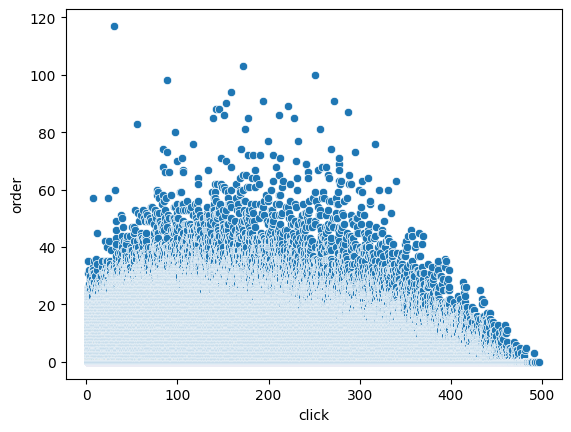

In [19]:
sns.scatterplot(data = df_type, x="click", y="order")

<AxesSubplot:xlabel='click', ylabel='order'>

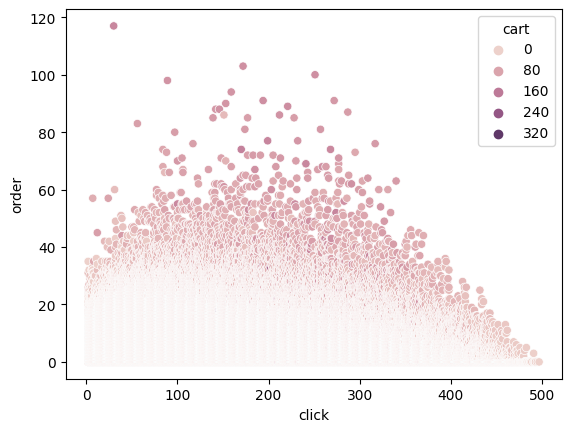

In [20]:
sns.scatterplot(data = df_type, x="click", y="order", hue="cart")

<AxesSubplot:xlabel='cart', ylabel='order'>

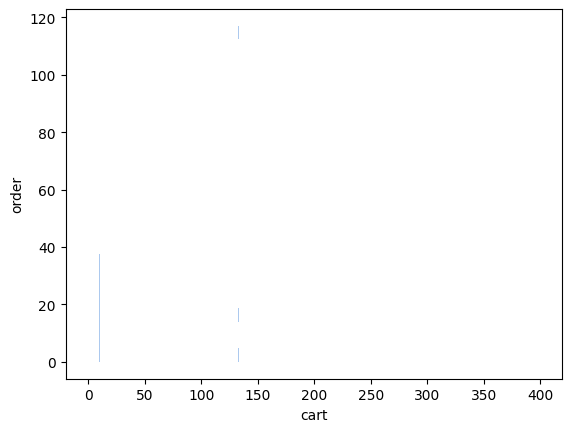

In [21]:
sns.histplot(data=df_type, x="cart", y="order")

**Now let's compare, how often every type of event occured**

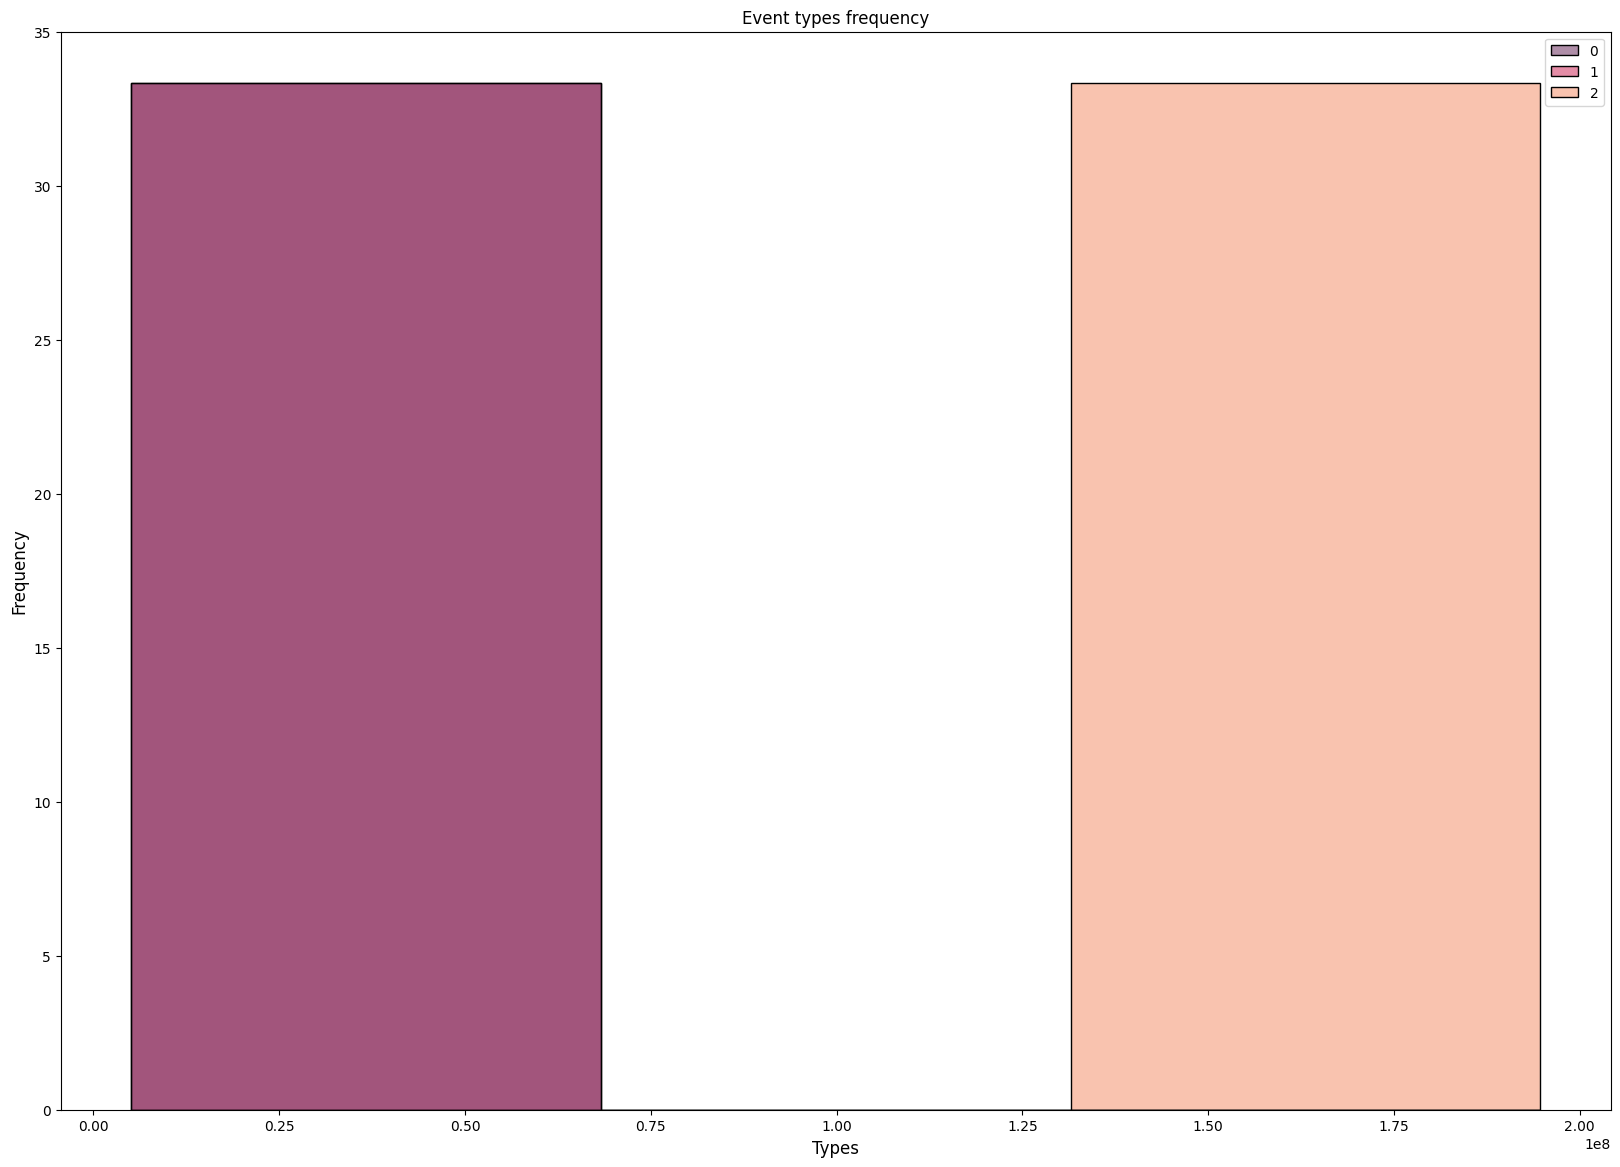

In [203]:
events_types = (df.lazy().groupby('type').agg([pl.count()]).sort("type", reverse=True)).collect()
fig, ax = plt.subplots(figsize=(20, 14))
sns.histplot(events_types.select('count'),stat='percent', kde=False, palette="rocket")
ax.set_title('Event types frequency', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Types', fontsize=12)
plt.show()

In [214]:
# from_ = [0, 1, 2]
# to_ = ['click', 'cart', 'order']

In [233]:
# events_types = events_types.with_column(
#     pl.when(pl.col("type") == from_[0])
#     .then(to_[0])
#     .when(pl.col("type") == from_[1])
#     .then(to_[1])
#     .when(pl.col("type") == from_[2])
#     .then(to_[2])
#     .otherwise(pl.col("type")).alias("Type_str")
# )

In [234]:
# events_types = events_types.with_column(pl.col("Type_str").cast(pl.Categorical))

In [235]:
# #events_types = (df.lazy().groupby('type').agg([pl.count()]).sort("type", reverse=True)).collect()
# fig, ax = plt.subplots(figsize=(16, 9))
# sns.barplot(x=events_types.select('count'), y=events_types.select('count'), ax=ax)
# ax.set_title('Event types frequency', fontsize=12)
# ax.set_ylabel('Frequency', fontsize=12)
# ax.set_xlabel('Types', fontsize=12)
# plt.show()

**let's visualize the Duration of each session**

In [100]:
def count_seconds(x):
    max_value = int(x.max())
    min_value = int(x.min())
    #session_time = timedelta(microseconds=max_value - min_value)
    session_time = timedelta(seconds=max_value - min_value)
    return session_time.total_seconds() / 60 

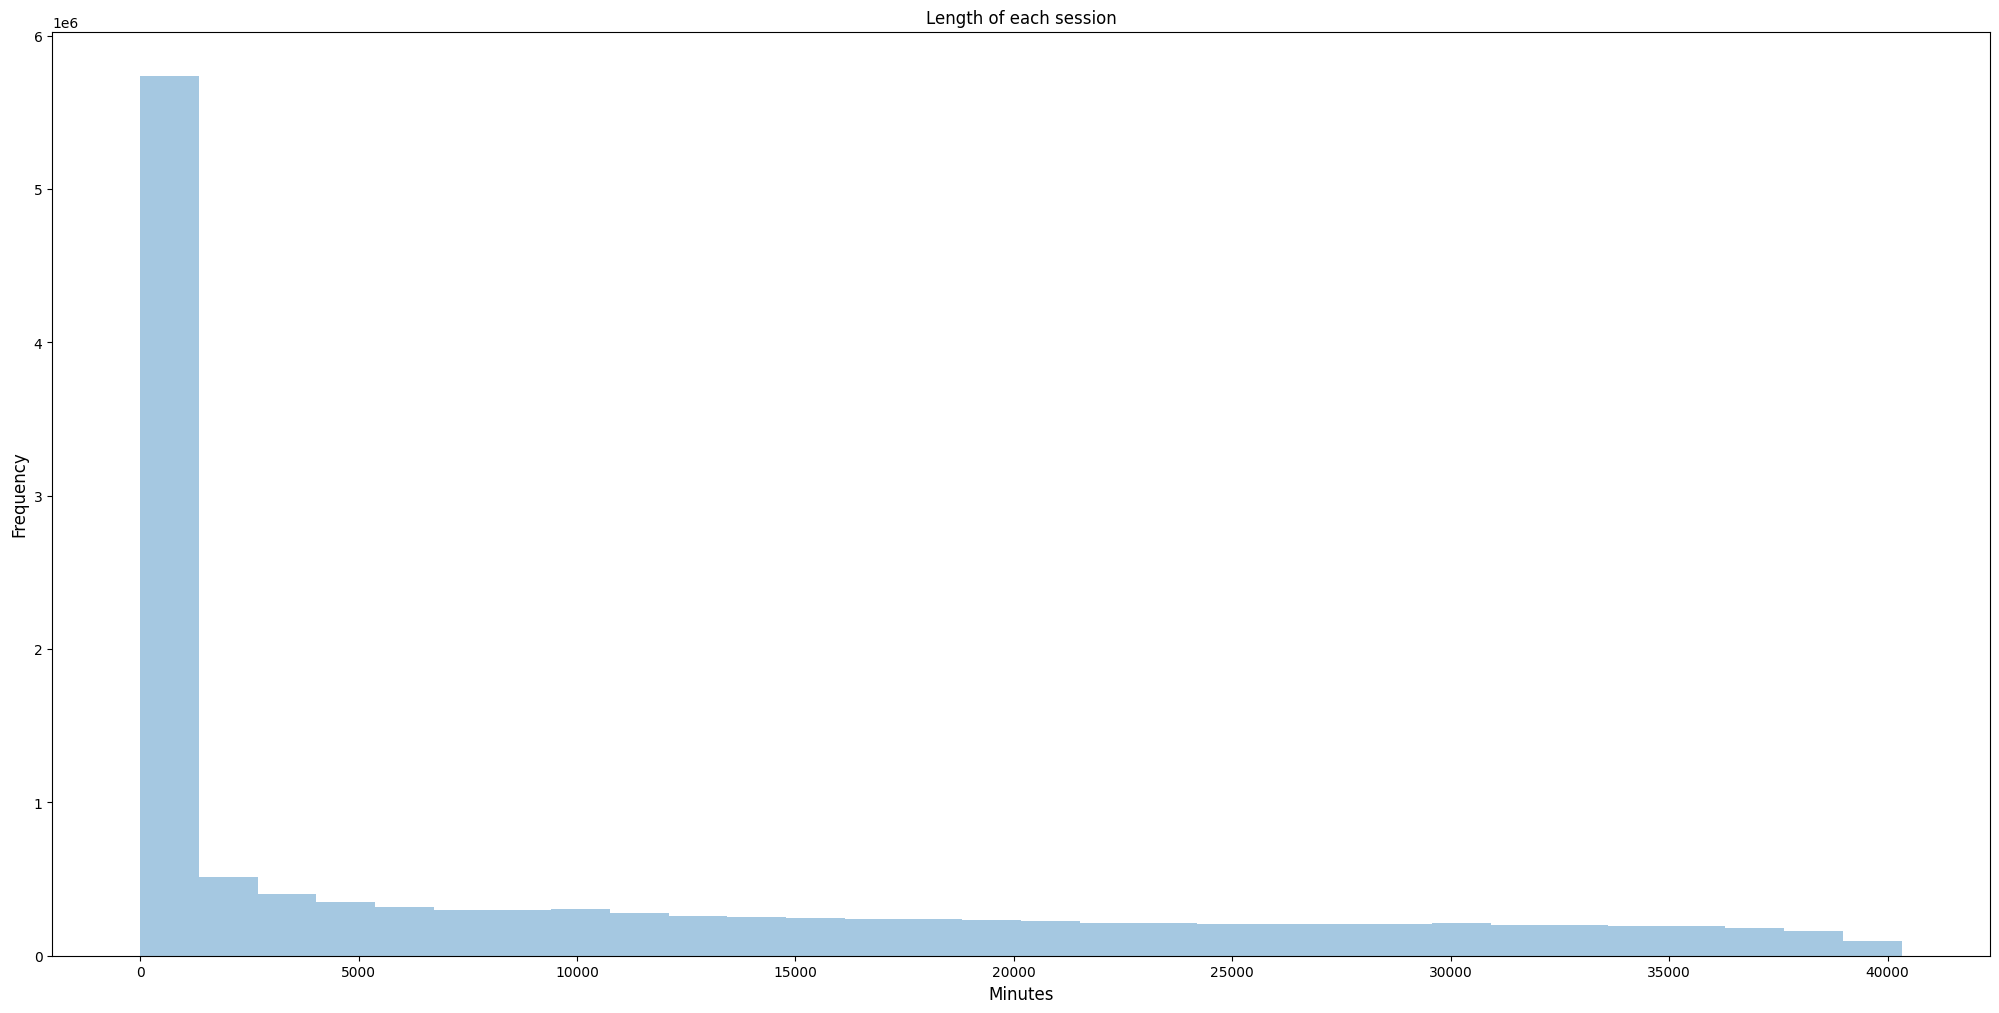

In [102]:
#time_counts = df.groupby(['session'])['ts'].apply(count_seconds)
time_counts = (df.lazy().groupby('session').agg([pl.col("ts").apply(count_seconds)]).sort("session", reverse=True)).collect()
fig, ax = plt.subplots(figsize=(25,12))
#sns.distplot(x=time_counts.values, ax=ax, bins=30, kde=False)
sns.distplot(x=time_counts.select('ts'), ax=ax, bins=30, kde=False)
ax.set_title('Length of each session', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Minutes', fontsize=12)
plt.show()

In [116]:
time_counts.describe()

describe,session,ts
str,f64,f64
"""count""",1.2899779e7,1.2899779e7
"""null_count""",0.0,0.0
"""mean""",6.449889e6,9875.644206
"""std""",3.7238e6,12149.109353
"""min""",0.0,0.0
"""max""",1.2899778e7,40319.85
"""median""",6.449889e6,3093.633333


In [115]:
# Number of session that have only one Action
time_counts.filter((pl.col("ts") == 0)).shape[0]

7240

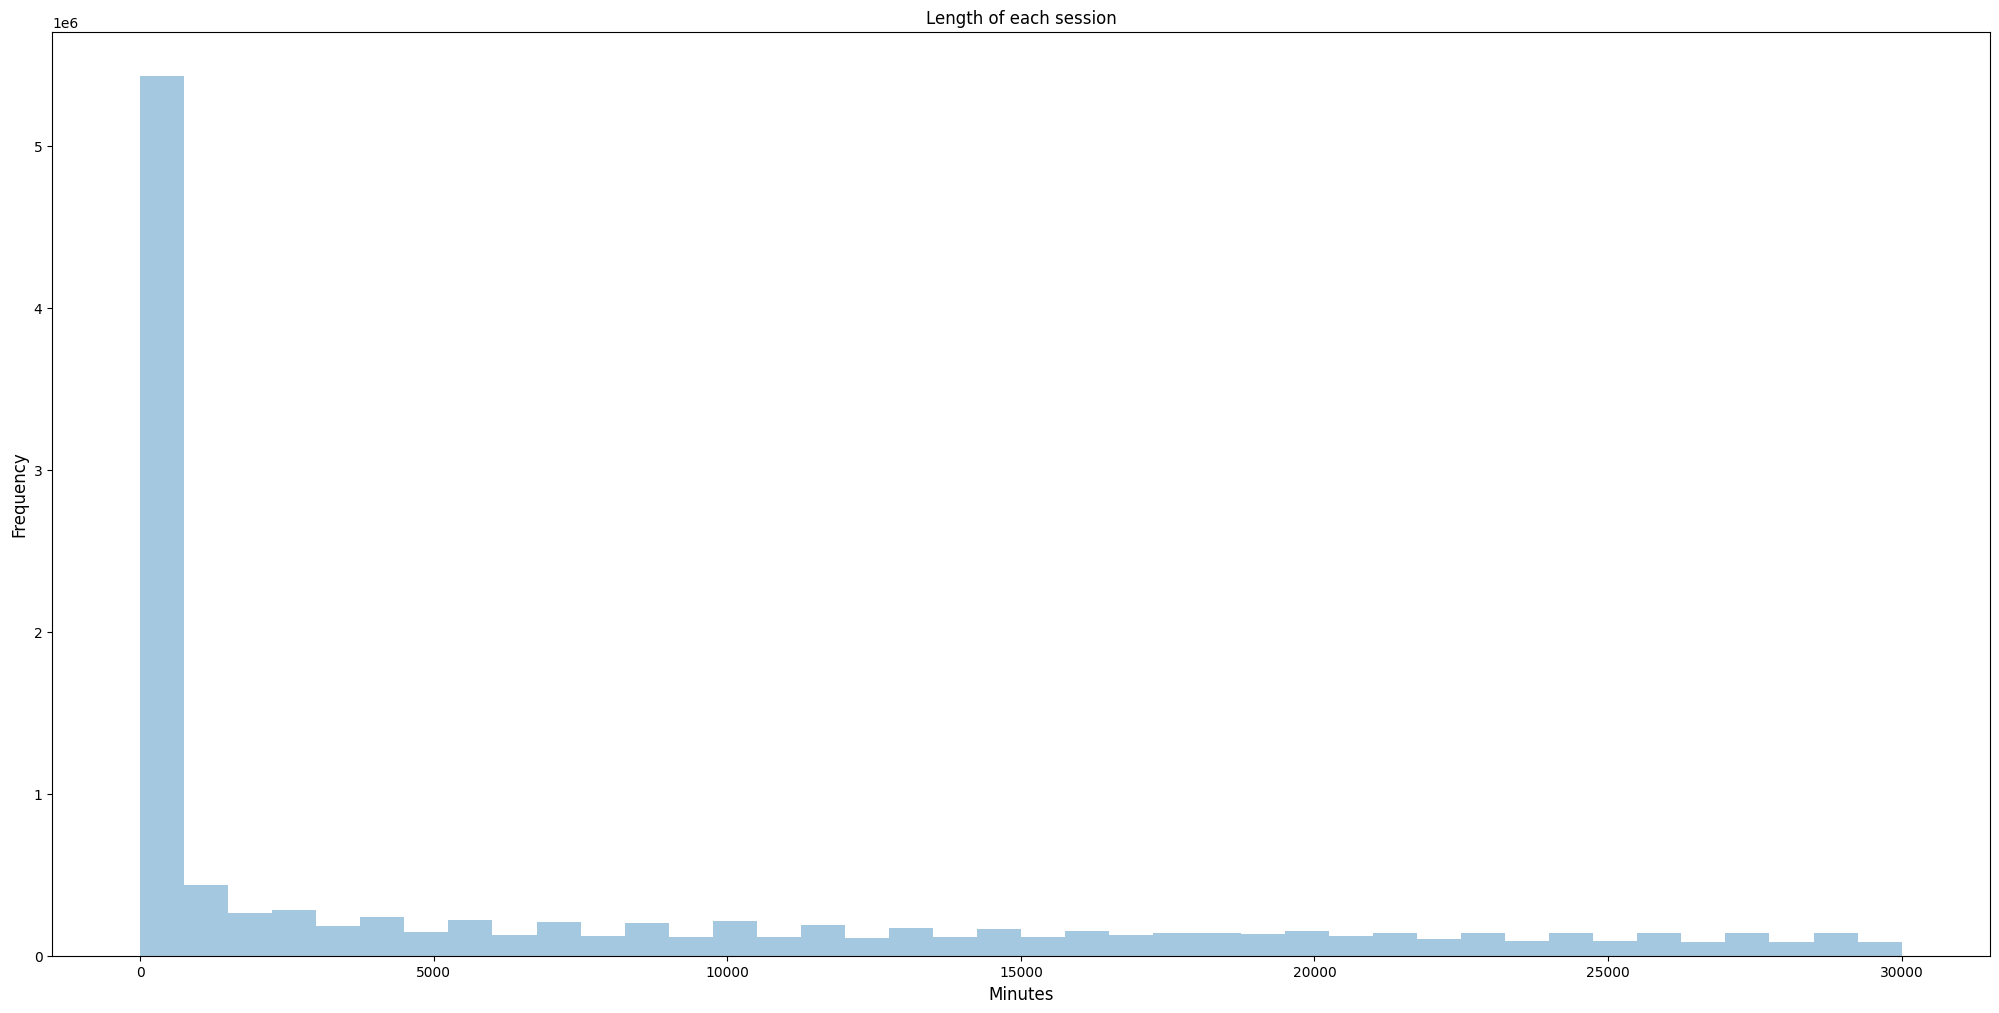

In [122]:
time_counts_picked = time_counts.filter((pl.col("ts") <= 30000))
fig, ax = plt.subplots(figsize=(25,12))
sns.distplot(x=time_counts_picked.select('ts'), ax=ax, bins=40, kde=False)
ax.set_title('Length of each session', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Minutes', fontsize=12)
plt.show()

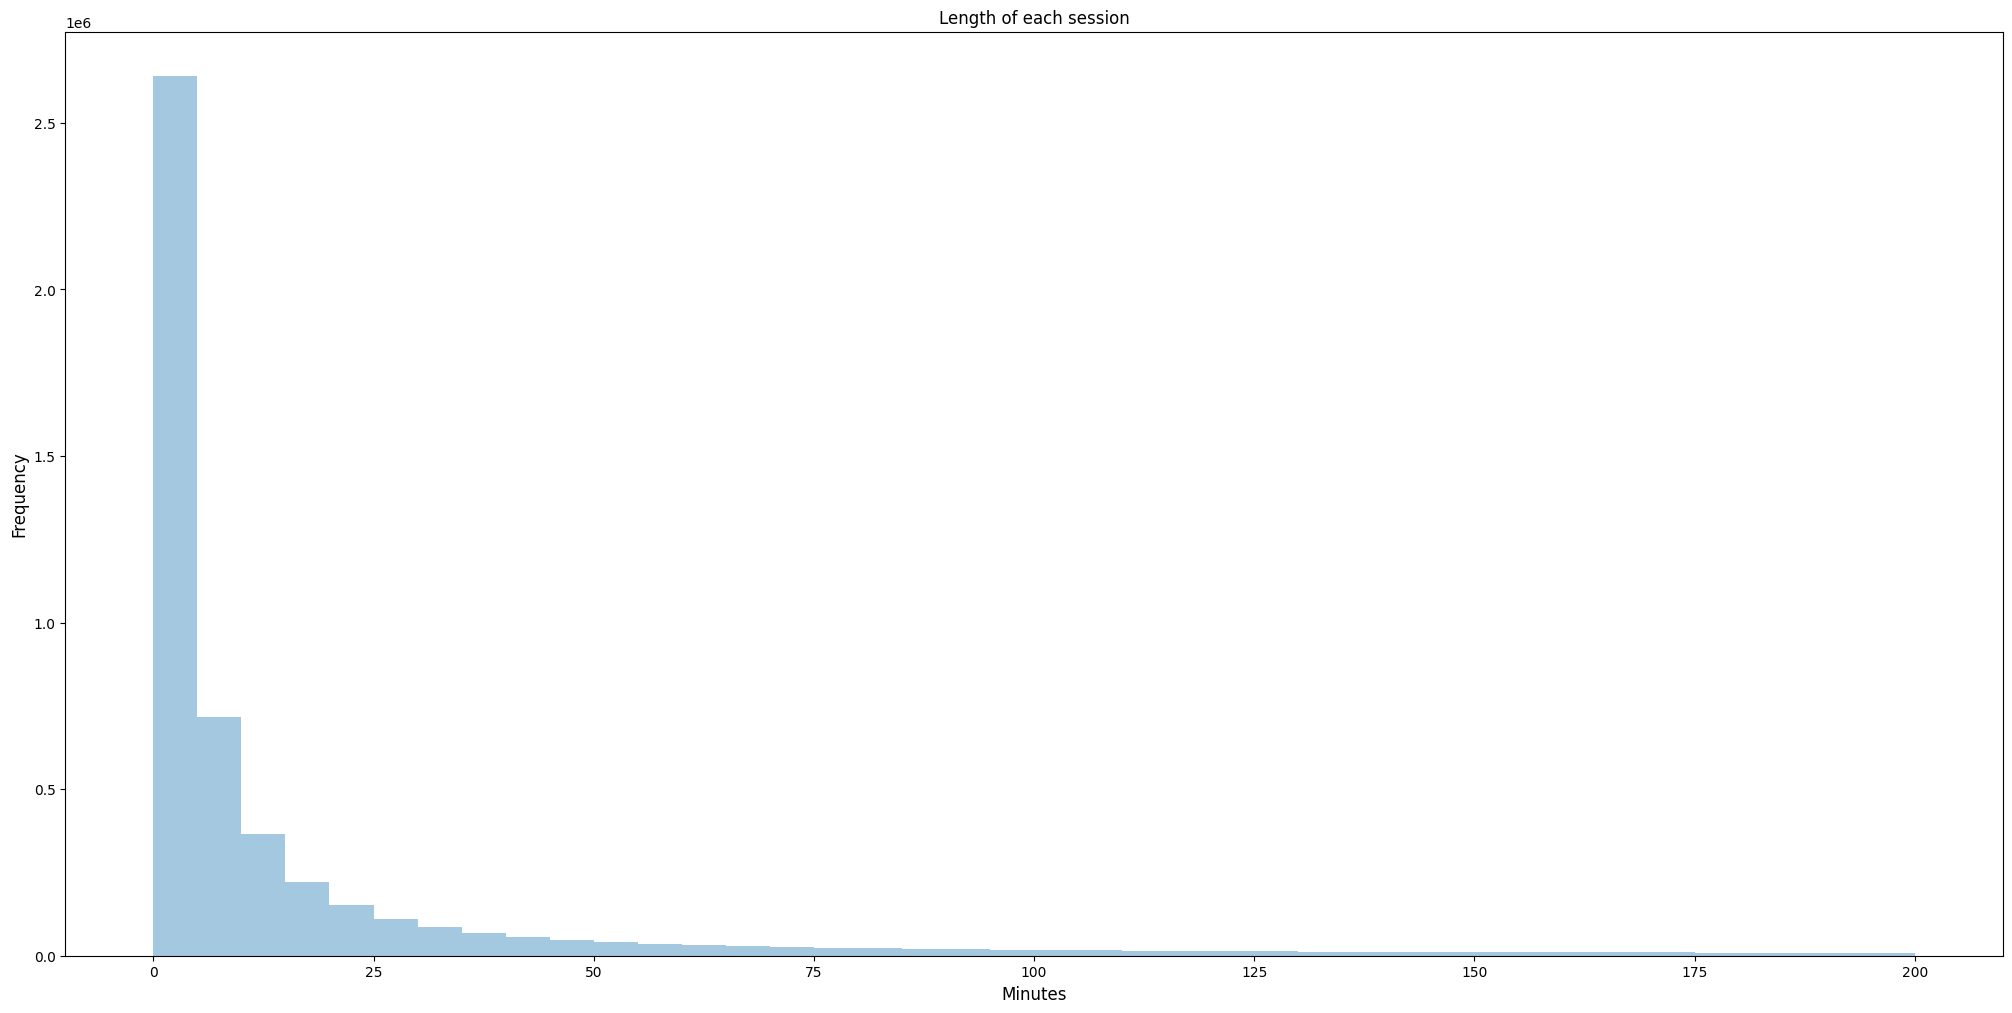

In [129]:
time_counts_picked2 = time_counts.filter((pl.col("ts") <= 200))
fig, ax = plt.subplots(figsize=(25,12))
sns.distplot(x=time_counts_picked2.select('ts'), ax=ax, bins=40, kde=False)
ax.set_title('Length of each session', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Minutes', fontsize=12)
plt.show()

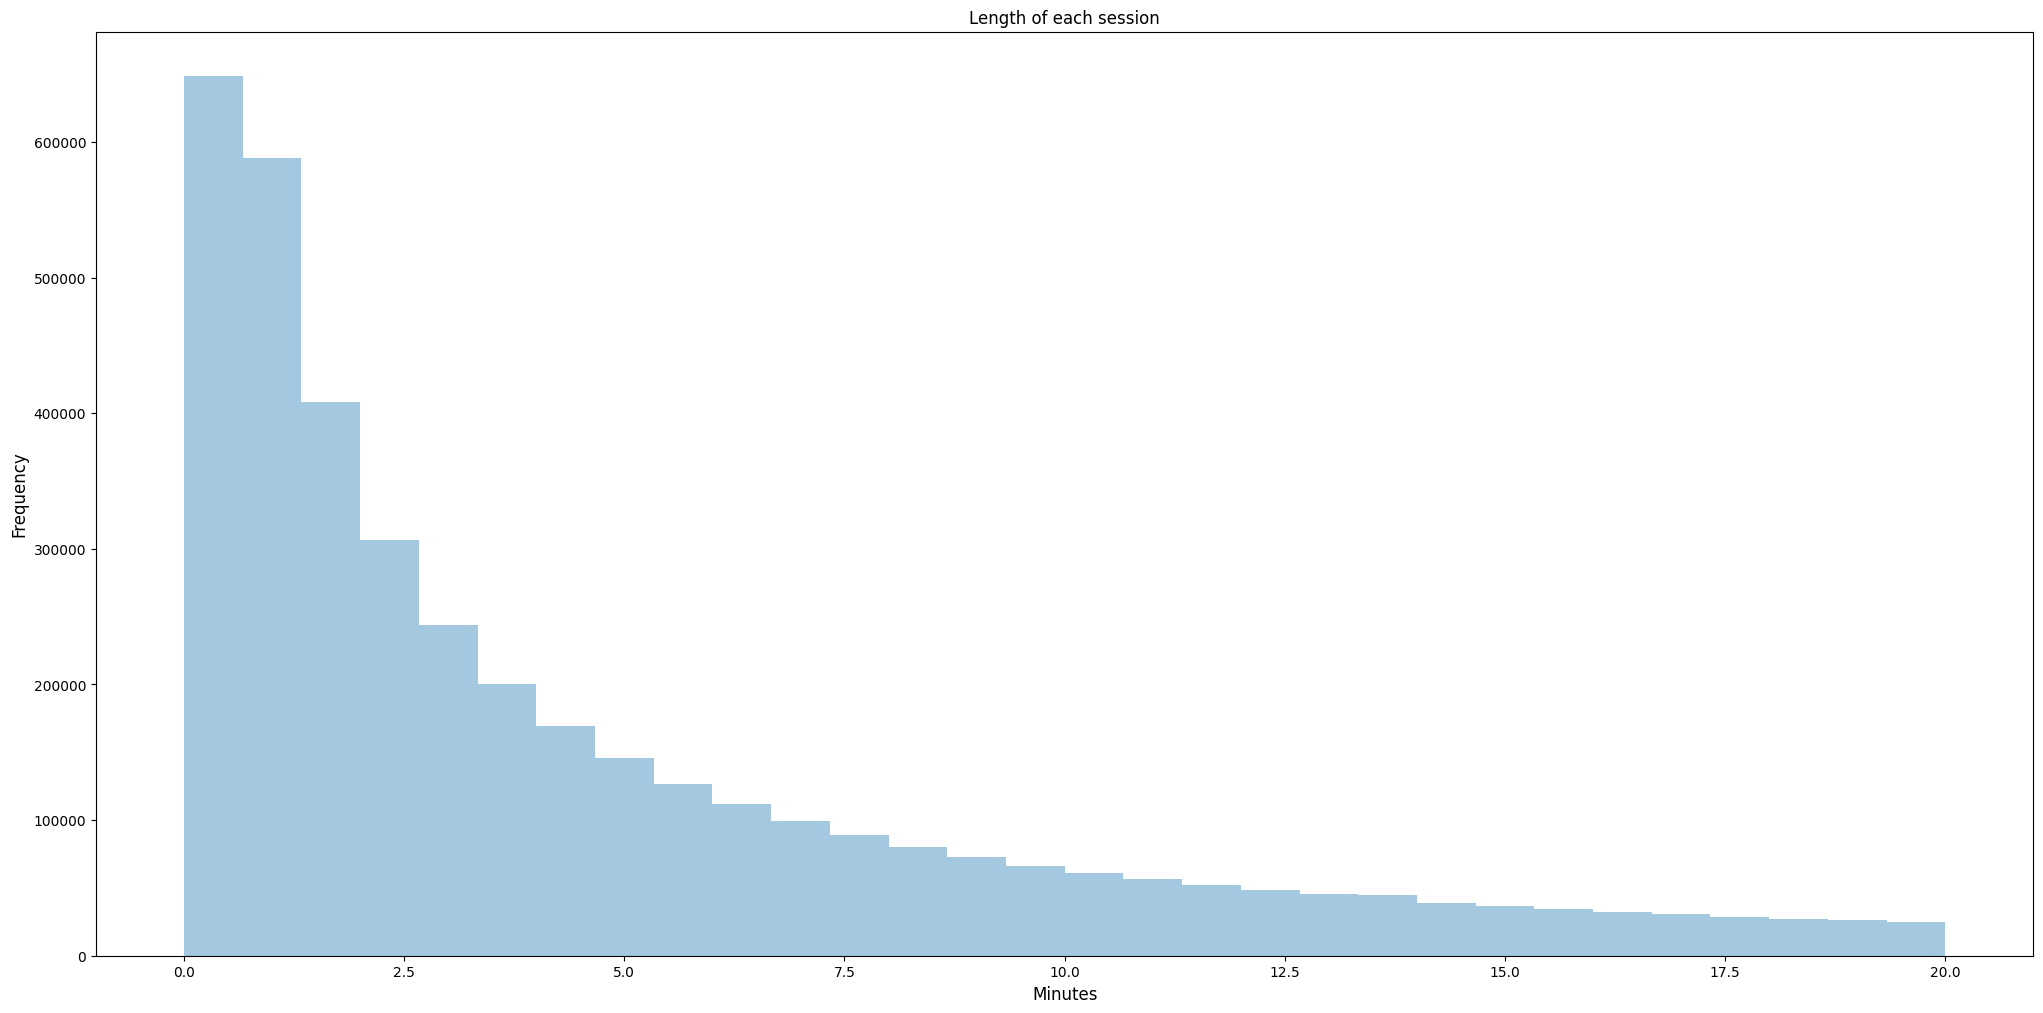

In [131]:
time_counts_picked3 = time_counts.filter((pl.col("ts") <= 20))
fig, ax = plt.subplots(figsize=(25,12))
sns.distplot(x=time_counts_picked3.select('ts'), ax=ax, bins=30, kde=False)
ax.set_title('Length of each session', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Minutes', fontsize=12)
plt.show()

In [126]:
# list of action ts for each session
#(df.lazy().groupby('session').agg([pl.col("ts").list()]).sort("session", reverse=True)).collect()

**let's visualize number of actions, performed in each session**

/Users/abderrahmen/Neue_fische/Capstone-OTTO-Multi-Objective-Recommender-System/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


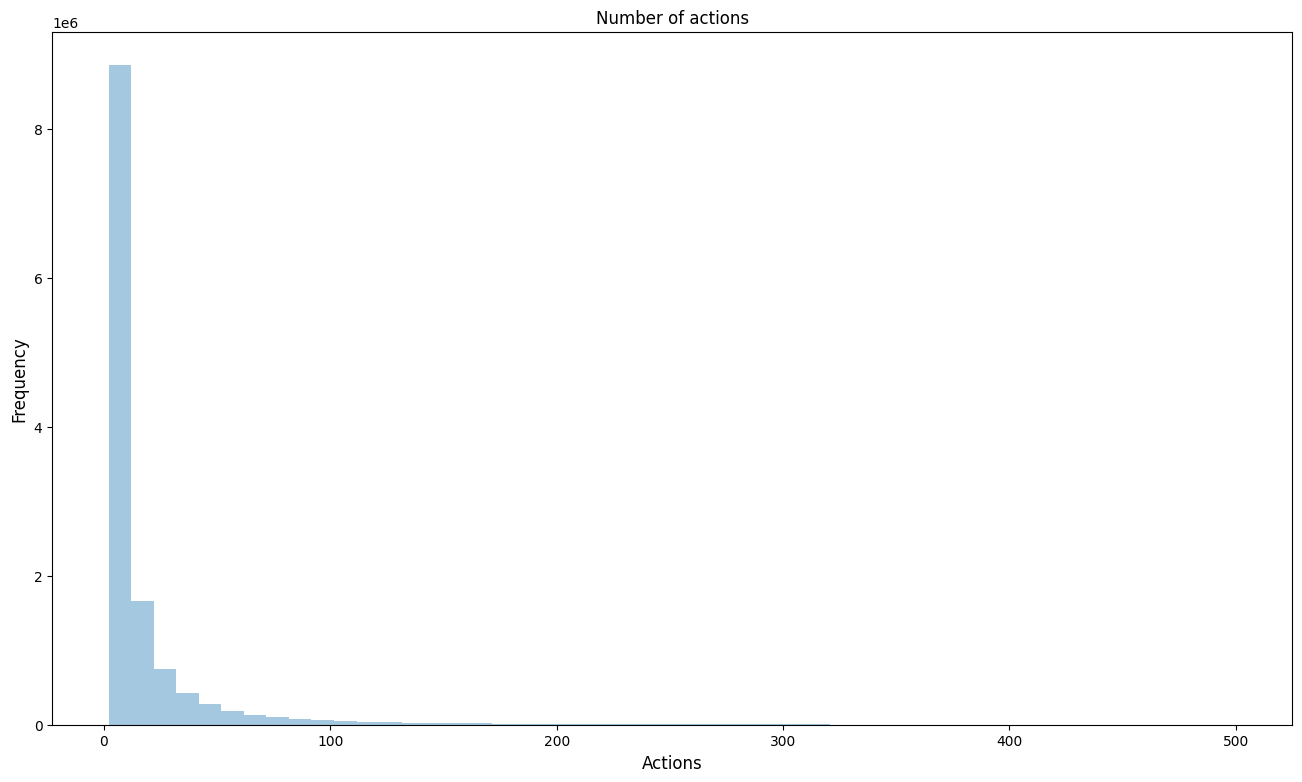

In [145]:
event_types_in_session = (df.lazy().groupby('session').agg([pl.col("ts").count()])).collect()
fig, ax = plt.subplots(figsize=(16, 9))
sns.distplot(x=event_types_in_session.select('ts'), ax=ax, bins=50, kde=False)
ax.set_title('Number of actions', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Actions', fontsize=12)
plt.show()

/Users/abderrahmen/Neue_fische/Capstone-OTTO-Multi-Objective-Recommender-System/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


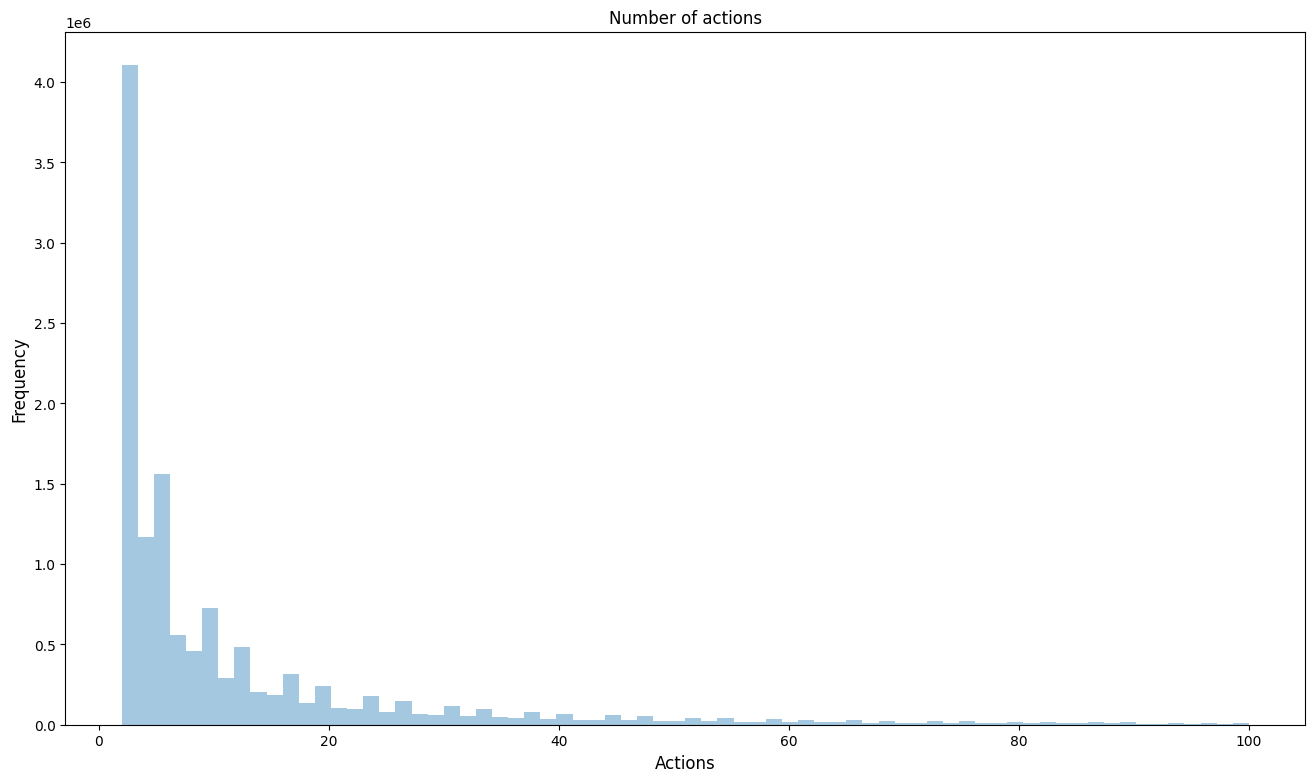

In [149]:
event_types_in_session_picked = event_types_in_session.filter((pl.col("ts") <= 100))
fig, ax = plt.subplots(figsize=(16, 9))
sns.distplot(x=event_types_in_session_picked.select('ts'), ax=ax, bins=70, kde=False)
ax.set_title('Number of actions', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Actions', fontsize=12)
plt.show()

In [240]:
from_ = [0, 1, 2]
to_ = ['click', 'cart', 'order']
df = df.with_column(
    pl.when(pl.col("type") == from_[0])
    .then(to_[0])
    .when(pl.col("type") == from_[1])
    .then(to_[1])
    .when(pl.col("type") == from_[2])
    .then(to_[2])
    .otherwise(pl.col("type")).alias("Type_str")
)

/var/folders/rx/16pwrm4j5xxb17sc0p6wq2jm0000gn/T/ipykernel_82461/2838758727.py:3: DeprecationWarning: `with_column` has been deprecated in favor of `with_columns`. This method will be removed in version 0.17.0
  df = df.with_column(


In [241]:
df

session,aid,ts,type,Type_str
i32,i32,i32,u8,str
0,1517085,1659304800,0,"""click"""
0,1563459,1659304904,0,"""click"""
0,1309446,1659367439,0,"""click"""
0,16246,1659367719,0,"""click"""
0,1781822,1659367871,0,"""click"""
0,1152674,1659367885,0,"""click"""
0,1649869,1659369893,1,"""cart"""
0,461689,1659369898,1,"""cart"""
0,305831,1659370027,2,"""order"""


In [245]:
[True if "order" in df["Type_str"] else False]

[False]

In [249]:
def filter_(x):
    if "order" in x:
        return True
        
    else:
        return False 

In [ ]:
lambda x: x['Type_str']

In [257]:
(df.lazy().groupby('session').agg([pl.col("Type_str").list().apply(filter_),[pl.col("ts").apply(count_seconds)])]).sort("session", reverse=True)).collect()

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (3071979805.py, line 1)

In [244]:
#(df.lazy().groupby('session').agg([pl.col("Type_str").apply(lambda x: x['Type_str'].eq('order').any())]).sort("session", reverse=True)).collect()

In [237]:
df

session,aid,ts,type
i32,i32,i32,u8
0,1517085,1659304800,0
0,1563459,1659304904,0
0,1309446,1659367439,0
0,16246,1659367719,0
0,1781822,1659367871,0
0,1152674,1659367885,0
0,1649869,1659369893,1
0,461689,1659369898,1
0,305831,1659370027,2


**Analyzing the Product-ids**

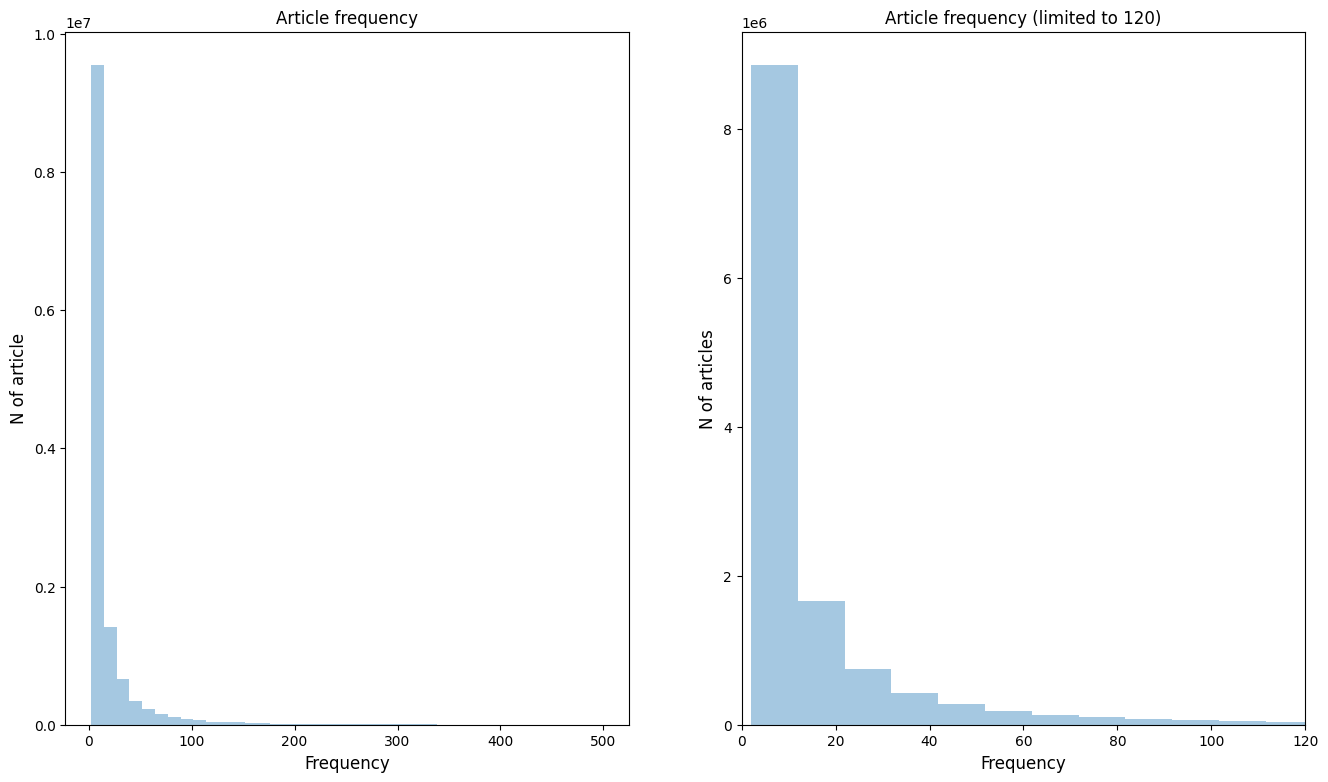

In [161]:
events_in_session = df.lazy().groupby('session').agg([pl.col("aid").count()]).sort("aid", reverse=True).collect()

fig, ax = plt.subplots(ncols=2, figsize=(16, 9))
sns.distplot(x=events_in_session.select('aid'), ax=ax[0], bins=40, kde=False)
ax[0].set_title('Article frequency', fontsize=12)
ax[0].set_ylabel('N of article', fontsize=12)
ax[0].set_xlabel('Frequency', fontsize=12)

sns.distplot(x=events_in_session.select('aid'), ax=ax[1], bins=50, kde=False)
ax[1].set_title('Article frequency (limited to 120)', fontsize=12)
ax[1].set_ylabel('N of articles', fontsize=12)
ax[1].set_xlabel('Frequency', fontsize=12)
ax[1].set_xlim(0, 120)

plt.show()